## Nishant Kumar

### House Price data


### Question :
Using the python code snippets in this example, put together Python code that applies a cross-validated k-nearest neighbour model from the house price data, and produces the following:

A 3-D plot of the house price for average floor area.
A 3-D plot of the house price for floor areas of 75 square metres.
A 3-D plot of the house price for floor areas of 125 square meters.

Use each of these in a short (1,000 word) report outlining the technique and describing the results. Use the Jupiter notepad format for this to make the report. To enter text in between the boxes with Python code in them, click on the option saying ‘code’ on the menu on the top of the input section (see below) and change it to Markdown. Then the boxes can be used to enter text rather than code. To go back to code, click on ‘Markdown’ and change it back to code.

#### Why python ?

Python is easy to use, powerful, and versatile, making it a great choice for beginners and experts.Python’s readability makes it a great first programming language moreover it allows you to think like a programmer and not waste time with confusing syntax. So, we have used python to implement the machine learning algorithms in this project.
Machine learning algorithms is used for predicting the house price of the london.It helps to understand the real world analysis of house price of london based on the past data set present to us.

#### Introduction :
 This project focus on producing the following :
 A 3-D plot of the house price for average floor area.
 A 3-D plot of the house price for floor areas of 75 square metres.
 A 3-D plot of the house price for floor areas of 125 square meters.
 
 These implementation is done by applying cross-validated k-nearest neighbour model from the house price data and producing the  above output the details of the process are discussed below.


In [9]:
import numpy as np
import pandas as pd


Before we start to implement the machine learning algorithms, we need to install few python library which will be helpful to apply diffrent function as per our requirements. We have many diffrent type of libraries available in python but we are going to use few of them with the names and details are provided below :

#### NumPy
Numpy is an open source numerical Python library.It contains a multi-dimentional array and matrix data structures. It is utilised to perform a number of mathematical operations on arrays such as trigonometric, statistical and algebraic routines. NumPy is named so because it is an extension of Numeric and Numarray. The library contains a large number of mathematical, algebraic and transformation functions.

#### pandas
Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.The name is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals.


In [10]:
hp = pd.read_csv('hpdemo.csv',dtype=float)

#### DATA:
The code above helps to read the data from hpdemo.csv. But we also need to keep the file in the same folder of the ipython file and run the above command to read the file. The main aim is to predict the house price using the variable east, north and fl_area using Machine Learning algorithms in python.

In [12]:
print(hp)

          ID      east     north     price  fl_area
0        1.0  523800.0  179700.0  107000.0     50.0
1        2.0  533200.0  170900.0   55500.0     66.0
2        3.0  514600.0  175800.0  103000.0     90.0
3        4.0  516000.0  171000.0  187000.0    125.0
4        5.0  533700.0  169200.0   43000.0     50.0
...      ...       ...       ...       ...      ...
1400  1401.0  515600.0  173100.0   68500.0     44.0
1401  1402.0  513200.0  186500.0   58500.0     59.0
1402  1403.0  542900.0  189500.0  247000.0    185.0
1403  1404.0  524900.0  185300.0  153000.0     96.0
1404  1405.0  522000.0  185400.0  146250.0    111.0

[1405 rows x 5 columns]


Now we print the sample data that was read by the above lines to understand clearly if the data has been read and is available to us. It also helps us to understand the structure of the data in order to work with the manipulation.

Before we start to implement the machine learning algorithms. We need to understand the are various stages in machine learning.
Stages in the Machine Learning Process are :
1. Data Preparation(to make sure data is in suitable format to process the data)
2. Choice of ML algorithm
3. Identification of tuning parameters
4. Identification of prediction scoring measure
5. Choice of tuning parameters to optimise scoring measure

#### 1. Data Preparation
Machine learning package used in python is called sklearn. It offers a number of algorithms for both supervised and unsupervised learning. Few tools are also present in set of utilities for re-scaling via z-scores. 

In [ ]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()


For standard scaling a function as StandardScaler is used. It produces a Python object that will do the scaling for a specific variable, or set of variables.

In [20]:
x_scaler.fit(hp[['east','north','fl_area']])

StandardScaler(copy=True, with_mean=True, with_std=True)

 The above snippet is used to calibrate the scaler, the fit method is used.

In [21]:
X = x_scaler.transform(hp[['east','north','fl_area']])

To transform data to z-scores the method is used.

In [22]:
print(X[:6,:])

[[-0.46109525 -0.0036912  -1.16501944]
 [ 0.39051366 -1.02696462 -0.73029338]
 [-1.29458482 -0.45718737 -0.07820428]
 [-1.16774945 -1.01533651  0.87275899]
 [ 0.435812   -1.22464244 -1.16501944]
 [ 1.72228503  1.1474914   0.05764762]]


#### 2. Choice of ML algorithm:
In this example, K-nearest neighbour model is used because normally house prices are estimated by agents, sellers or buyers based on the house prices of nearby houses. As house price is being predicted,a supervised learning algorithm should be used and with house prices being quantitative, a regression algorithm is choosen.


In [23]:
from sklearn.neighbors import KNeighborsRegressor as NN

In [ ]:
A function KNeighborsRegressor is imported from sklearn.neighbors package to perform this algorithm.

In [24]:
reg_object = NN(n_neighbors=6,weights='uniform',p=2)

#### 3. Identification of tuning parameters
As K-nearest neighbour algorithm is used, tuning parameters has to be defined to find out the best fitting model. Tuning parameters used below are:
Number of nearest neighbours (k).
Where to use a distance weighted mean or uniform weighted mean as a predictor from the k nearest neighbour values.
Distace matrix to use: Euclidean (p=2) or City Block (p=1).


In [25]:
price = hp['price']/1000.0
reg_object.fit(X,price)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

The house price will be copied from the hp data frame, into an array called price. 
It is divided by 1,000, to avoid rounding errors.

In [26]:
predicted_price = reg_object.predict(x_scaler.transform([[523800.0,179750.0,55.0]]))
print(predicted_price)

[128.5]


#### 4.Identification of prediction scoring measure
reg_object has now ‘learned’ to make predictions of the price of a house given its location and floor area.
The method is used above to understand what values it is going to predict. The predicted price is 128.5 thousand pounds.


In [28]:
from sklearn.metrics import mean_absolute_error, make_scorer
mae = make_scorer(mean_absolute_error, greater_is_better=False)

 The cross-validation grid search is specified. This is done using a function in sklearn.grid_search called GridSearchCV.

In [29]:
from sklearn.model_selection import GridSearchCV
opt_nn = GridSearchCV(
    estimator = NN(),
    scoring = mae,
    param_grid = {
        'n_neighbors':range(1,35),
        'weights':['uniform','distance'],
        'p':[1,2]})

######  5.Choice of tuning parameters to optimise scoring measure:

One of the simplest approaches of finding optimum tuning parameters is to iterate across all possible combinations of tuning parameters, apply cross validation procedure for each combination of values and select the combination that is best fit. This process is called as cross validation grid search.
Cross-Validation is a technique where a subset of the full data set called the training set is used to develop the model. Optimum model parameters are then identified by comparing the model predictions relative to the remainder of the data known as the test set. Cross validation grid search is symmetrical because it computes two cross validation scores, one with the original training & test dataset and other by swapping the training & test dataset, and the average of the two scores is taken. 

In [30]:
opt_nn.fit(X,price)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 35), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

We fit the model in the above statement.

In [31]:
predicted_hp = opt_nn.predict(
    x_scaler.transform([[523800.0,179750.0,55.0]]))
print(predicted_hp)

[122.53520623]


Then ,we carry out the prediction from the trained opt_nn.

In [ ]:
print(opt_nn.best_estimator_.get_params())

In [33]:
print(opt_nn.best_score_)

-26.44326967264284


Best_score returns the actual score.

In [34]:
def print_summary(opt_reg_object):
    params = opt_reg_object.best_estimator_.get_params()
    score = - opt_reg_object.best_score_
    print("Nearest neighbours: %8d" % params['n_neighbors'])
    print("Minkowski p       : %8d" % params['p'])
    print("Weighting         : %8s" % params['weights'])
    print("MAE Score         : %8.2f" % score)
    return

In [ ]:
A neat summary is being created by writing a function.

In [35]:
print_summary(opt_nn)

Nearest neighbours:       16
Minkowski p       :        1
Weighting         : distance
MAE Score         :    26.44


In [36]:
from sklearn.pipeline import Pipeline

#### PIPELINES:

Normal model fitting algorithm involves scaling of data, then application of ML algorithm and then prediction of response. Scaling alone involves creating a scaler object, calibrating model using fit function and then transforming variables to z-scores. We need to perform these operations manually. Pipelines contains whole process including the scaling, calibrating models and make predictions directly using the original data. To use pipeline, a function called pipeline has to be imported from sklearn pipeline package and then perform the operations in a single pipeline as below:


In [37]:
pipe = Pipeline([('zscores',StandardScaler()),
    ('NNreg',NN(n_neighbors=6,weights='uniform',p=2))])

Here an object pipe is created and the operations of pipeline is stored in that. This pipeline object can be used to fit and predict in the same way as any other objects. This pipeline object can also be used on the original unscaled data as the pipeline object will scale the data in the first z-scores block of the pipeline before passing this scaled data to the subsequent NNreg block of the pipeline. It is also possible to add additional blocks to the pipeline if required.

In [38]:
pipe.fit(hp[['east','north','fl_area']],price)

Pipeline(memory=None,
         steps=[('zscores',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('NNreg',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=6, p=2,
                                     weights='uniform'))],
         verbose=False)

In [39]:
print(pipe.predict([[523800.0,179750.0,55.0]]))

[128.5]


In [40]:
pipe = Pipeline([('zscores',StandardScaler()),('NNreg',NN())])

opt_nn2 = GridSearchCV(
    estimator = pipe,
    scoring = mae,
    param_grid = {
        'NNreg__n_neighbors':range(1,35),
        'NNreg__weights':['uniform','distance'],
        'NNreg__p':[1,2]})

In [41]:
opt_nn2.fit(hp[['east','north','fl_area']],price)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('zscores',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('NNreg',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            metric='minkowski',
                                                            metric_params=None,
                                                            n_jobs=None,
                                                            n_neighbors=5, p=2,
                                                            weights='uniform'))],
                                verbose=False),
            

In [42]:
print(opt_nn2.predict([[523800.0,179750.0,55.0]]))

[122.53520623]


Attributes called best_estimator_ and best_score_ are used to determine the regression model that performed best and to return the actual score.

In [43]:
def print_summary2(opt_pipe_object):
    params = opt_pipe_object.best_estimator_.get_params()
    score = - opt_pipe_object.best_score_
    print("Nearest neighbours: %8d" % params['NNreg__n_neighbors'])
    print("Minkowski p       : %8d" % params['NNreg__p'])
    print("Weighting         : %8s" % params['NNreg__weights'])
    print("MAE Score         : %8.2f" % score)
    return

A neat summary is being created by writing a function.

In [45]:
print_summary2(opt_nn2)

Nearest neighbours:       16
Minkowski p       :        1
Weighting         : distance
MAE Score         :    26.42


In [46]:
east_mesh, north_mesh = np.meshgrid(
    np.linspace(505000,555800,100),
    np.linspace(158400,199900,100))

In [47]:
fl_mesh = np.zeros_like(east_mesh)

In [48]:
fl_mesh[:,:] = np.mean(hp['fl_area'])

In [49]:
print(east_mesh.shape)

(100, 100)


In [50]:
print(north_mesh.shape)

(100, 100)


In [51]:
grid_predictor_vars = np.array([east_mesh.ravel(),
    north_mesh.ravel(),fl_mesh.ravel()]).T 

In [52]:
hp_pred = opt_nn2.predict(grid_predictor_vars)

In [53]:
hp_mesh = hp_pred.reshape(east_mesh.shape)

#### VISUALISING THE RESULTS:
 A 3D surface plot of the predictions for each of the specified house sizes was created by firstly generating a 100x100 grid covering the range of easting and northing values, and then calculating the predicted house price at each grid location for the specified floor area. This was then plotted using the mpl_toolkits.mplot3D function. The python code is below:

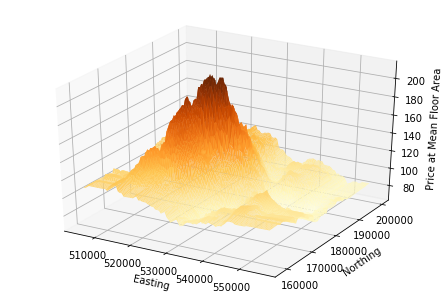

In [54]:
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D

fig = pl.figure()
ax = Axes3D(fig)
ax.plot_surface(east_mesh, north_mesh, hp_mesh, rstride=1, cstride=1, cmap='YlOrBr',lw=0.01)
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
ax.set_zlabel('Price at Mean Floor Area')
pl.show()

In [55]:
def surf3d(pipe_model,fl_area):
    east_mesh, north_mesh = np.meshgrid(
        np.linspace(505000,555800,100),
        np.linspace(158400,199900,100))
    fl_mesh = np.zeros_like(east_mesh)
    fl_mesh[:,:] = fl_area
    grid_predictor_vars = np.array([east_mesh.ravel(),
        north_mesh.ravel(),fl_mesh.ravel()]).T
    hp_pred = pipe_model.predict(grid_predictor_vars)
    hp_mesh = hp_pred.reshape(east_mesh.shape)
    fig = pl.figure()
    ax = Axes3D(fig)
    ax.plot_surface(east_mesh, north_mesh, hp_mesh, 
        rstride=1, cstride=1, cmap='YlOrBr',lw=0.01)
    ax.set_xlabel('Easting')
    ax.set_ylabel('Northing')
    ax.set_zlabel('Price at Mean Floor Area')
    pl.show()
    return

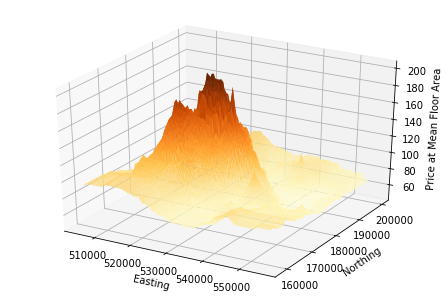

In [57]:
pl.close()
surf3d(opt_nn2,75.0)
pl.show()

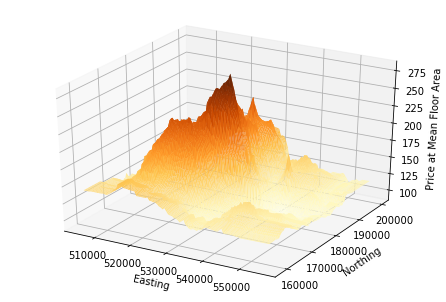

In [58]:
pl.close()
surf3d(opt_nn2,125.0)
pl.show()

#### Plot observation 
The three 3D plot presented above predicts the house price of london for the given values at each eastings and northing location in london.The darker colour represents peak price location wheras the light colour represents the lower price of the area. The below are the observation obtained from the above three plot depicted above :
 >1. House prices decreases for all house sizes as you move further away in any direction from this central peaklocation but there is slight variation before the steady decrease in some sub urban region.           
 >2. The peak price location for the given above three house size categories is almost same location between 520000/530000 easting and about 180000 northing.                     
 >3. The price range starts from 100k pounds for 125 sq-mtrs.    
 >4. The price range starts from 50k pounds for 75 sq-mtrs.    
 >5. The maximum house price for 125 sq-mtrs floor area is 230k pounds.     
 >6. The maximum house price for 75 sq-mtrs it is 160k pounds.


#### Conclusion
From this analysis, it is evident that predicted house price is not just dependent on the variable of easting and northings and floor area. There are various other factors which may be responsible for the change in the house price. These can be understood from the 3D plot obtained by the three diffrent floor areas, shows variation in the graph obtained. Thus, leads to the conclusion, that these variable are no just only measures of house price in london.
